In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
cd /content/drive/MyDrive/my_vietocr/

/content/drive/MyDrive/my_vietocr


In [4]:
!pip install einops

In [5]:
!pip install jiwer

     |████████████████████████████████| 50 kB 1.7 MB/s 
  Created wheel for python-Levenshtein: filename=python_Levenshtein-0.12.2-cp37-cp37m-linux_x86_64.whl size=149866 sha256=32052c4bb756944cfe51122f84363fe0516ad601126ccc70228225530e572337
  Stored in directory: /root/.cache/pip/wheels/05/5f/ca/7c4367734892581bb5ff896f15027a932c551080b2abd3e00d
Successfully built python-Levenshtein


# PREDICT

In [6]:
import matplotlib.pyplot as plt
from PIL import Image

from vietocr.tool.predictor import Predictor
from vietocr.tool.config import Cfg

In [7]:
config = Cfg.load_config_from_name('vgg_transformer')

In [8]:
config['weights'] = 'vietocr/weights/1912/transformerocr_30000.pth'
config['cnn']['pretrained']=True
config['device'] = 'cuda:0'
# config['device'] = 'cpu'
config['predictor']['beamsearch']=False

In [9]:
detector = Predictor(config)

Downloading: "https://download.pytorch.org/models/vgg19_bn-c79401a0.pth" to /root/.cache/torch/hub/checkpoints/vgg19_bn-c79401a0.pth


  0%|          | 0.00/548M [00:00<?, ?B/s]

In [15]:
import base64
from io import BytesIO
from PIL import Image

with open(IMG_PATH, "rb") as f:
    im_b64 = base64.b64encode(f.read())

im_bytes = base64.b64decode(im_b64)   # im_bytes is a binary image
im_file = BytesIO(im_bytes)  # convert image to file-like object
img = Image.open(im_file)   # img is now PIL Image object

('An Giang, Cẩm Lạc Quận 111%,', 0.8951121824128287)

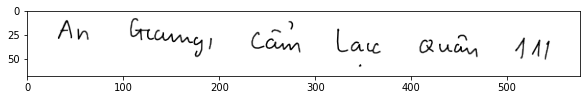

In [16]:
# IMG_PATH = '/content/drive/MyDrive/my_vietocr/TestAddr/0100_tests.png'
# IMG_PATH = '/content/drive/MyDrive/Diffusion-Handwriting-Generation/assets/writer1.png'
# IMG_PATH = '/content/drive/MyDrive/my_vietocr/my_ocr/gen2_100.png'
# img = Image.open(IMG_PATH)
plt.figure(figsize=(1.2* img.size[0]/img.size[1], 1.2))
plt.imshow(img)
s = detector.predict(img, True)
s

In [ ]:
config1 = Cfg.load_config_from_name('vgg_transformer')
config1['weights'] = 'vietocr/weights/transformerocr14000.pth'
config1['cnn']['pretrained']=True
# config['device'] = 'cuda:0'
config1['device'] = 'cpu'
config1['predictor']['beamsearch']=False
detector1 = Predictor(config1)

In [ ]:
s = detector1.predict(img, True)
s

('61/14A đường số 19, Phường 8, Quận Gò Vấp, TP Hồ Chí Minh',
 0.931341664832935)

In [10]:
!pip install flask_ngrok

In [ ]:
from flask import Flask, render_template, request
from werkzeug.utils import secure_filename
from flask_ngrok import run_with_ngrok

app = Flask(__name__)
run_with_ngrok(app)  # Start ngrok when app is run

@app.route("/")
def my_form():
  return render_template('index.html')

@app.route('/', methods=['POST'])
def my_form_post():
    text = request.form['u']
    res = predict_text(model, text)
    listvar = [text, res]
    return render_template('index.html', variable=listvar)


if __name__ == '__main__':
    app.run()

In [11]:
!pip install flask_restful

     |████████████████████████████████| 52 kB 1.2 MB/s 


In [14]:
from flask import Flask,url_for,render_template,request
import json
import torch
import time
from flask import Flask, request, jsonify, Blueprint
from flask_restful import reqparse, abort, Api, Resource, marshal_with
import uuid
import base64
from flask_ngrok import run_with_ngrok
from io import BytesIO
from PIL import Image


app = Flask(__name__)
run_with_ngrok(app)
api_bp = Blueprint('api', __name__)
api = Api(api_bp)
# api = Api(app)

parser = reqparse.RequestParser(bundle_errors = True)
parser.add_argument('data', type=str, required=True, help='Content cannot be left blank')

def convertImgToBase64(img_path):
	with open(img_path, 'rb') as f:
		return base64.encodebytes(f.read()).decode('ascii')

def convertBase64ToCV2(img_text):
    img_org = base64.b64decode(img_text)
    img_np = np.frombuffer(img_org, dtype=np.uint8)
    return cv2.imdecode(img_np, flags=1)

class HandwrittingOCR(Resource):
    def post(self):
        # try:
            args = parser.parse_args()
            im_b64 =  args.data
            im_bytes = base64.b64decode(im_b64)   # im_bytes is a binary image
            im_file = BytesIO(im_bytes)  # convert image to file-like object
            img = Image.open(im_file)
            res = detector.predict(img)
            data = {'text': res}
        # except Exception as e:
            # data = {'error': 200}
            return jsonify(data)

api.add_resource(HandwrittingOCR,'/ocr/')
app.register_blueprint(api_bp)

if __name__=='__main__':
    app.run()

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)


 * Running on http://0d54-35-222-39-95.ngrok.io
 * Traffic stats available on http://127.0.0.1:4040


127.0.0.1 - - [21/Dec/2021 08:58:00] "POST /ocr/ HTTP/1.1" 200 -
127.0.0.1 - - [21/Dec/2021 09:04:03] "POST /ocr/ HTTP/1.1" 200 -


# TRAIN

In [ ]:
from vietocr.tool.config import Cfg
from vietocr.model.trainer import Trainer

In [ ]:
config = Cfg.load_config_from_name('vgg_transformer')

In [ ]:
#config['vocab'] = 'aAàÀảẢãÃáÁạẠăĂằẰẳẲẵẴắẮặẶâÂầẦẩẨẫẪấẤậẬbBcCdDđĐeEèÈẻẺẽẼéÉẹẸêÊềỀểỂễỄếẾệỆfFgGhHiIìÌỉỈĩĨíÍịỊjJkKlLmMnNoOòÒỏỎõÕóÓọỌôÔồỒổỔỗỖốỐộỘơƠờỜởỞỡỠớỚợỢpPqQrRsStTuUùÙủỦũŨúÚụỤưƯừỪửỬữỮứỨựỰvVwWxXyYỳỲỷỶỹỸýÝỵỴzZ0123456789!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~ '
dataset_params = {
    'name':'1712_hw',
    'data_root':'/content/drive/MyDrive/my_vietocr/',
    'data_root_test': '/content/drive/MyDrive/my_vietocr/TestAddr',
    'train_annotation':'/content/drive/MyDrive/my_vietocr/vietocr/train_annotation.txt',
    'valid_annotation':'/content/drive/MyDrive/my_vietocr/vietocr/valid_annotation.txt',
    'test_annotation': '/content/drive/MyDrive/my_vietocr/vietocr/test_annotation.txt'
}

params = {
         'print_every':200,
         'valid_every':10*200,
          'iters':30000,
          'checkpoint':'vietocr/checkpoints/1412/transformerocr_checkpoint.pth',    
          'export':'vietocr/weights/transformerocr_1412_',
          'metrics': 10000
         }
config['dataloader']= {'num_workers': 2, 'pin_memory': True}
config['trainer'].update(params)
config['dataset'].update(dataset_params)
config['device'] = 'cuda:0'
# config['device'] = 'cpu'
config['best_acc'] = 0.0892
config['pretrain'] = 'vietocr/weights/1712/transformerocr_24000.pth'
config['log'] = 'log/train_.txt'

In [ ]:
trainer = Trainer(config, pretrained = True)

train_1712_hw exists. Remove folder if you want to create new dataset


train_1712_hw build cluster: 100%|███████████████████████████| 1458/1458 [00:00<00:00, 75413.68it/s]

valid_1712_hw exists. Remove folder if you want to create new dataset



valid_1712_hw build cluster: 100%|█████████████████████████████| 365/365 [00:00<00:00, 35831.97it/s]

test_1712_hw exists. Remove folder if you want to create new dataset



test_1712_hw build cluster: 100%|██████████████████████████████| 549/549 [00:00<00:00, 50139.86it/s]


In [ ]:
trainer.precision('train')

100%|██████████| 46/46 [02:31<00:00,  3.30s/it]


['Số 10, ngõ 171 Kiều Mai, Phường Phúc Diễn, Quận Bắc Từ Liêm, Hà Nội', 'Thị trấn Kinh Môn, Huyện Kinh Môn, Hải Dương', '29/1 đường Gò Công, Phường 13, Quận 5, TP Hồ Chí Minh', '28/6 Trương Công Định, Phường 14, Quận Tân Bình, TP Hồ Chí Minh', 'Số 210 Bạch Mai, Phường Cầu Dền, Quận Hai Bà Trưng, Hà Nội', 'Xóm 1, Thôn Cam 1, Xã Cổ Bi, Huyện Gia Lâm, Hà Nội', '185/50 Ba Tháng Hai, Phường 11, Quận 10, TP Hồ Chí Minh', '31B Trưng Nhị, Phường Đức Nghĩa, Thành phố Phan Thiết, Bình Thuận', '168B Bùi Thị Xuân, Phường Phạm Ngũ Lão, Quận 1, TP Hồ Chí Minh', 'Số 260 Khương Đình, Phường Hạ Đình, Quận Thanh Xuân, Hà Nội', 'Số nhà 42 Xuân Diệu, Phường Tân Lợi, TP.Buôn Ma Thuột, Đắc Lắc', '35/11 Trần Đình Xu, Phường Cầu Kho, Quận 1, TP Hồ Chí Minh', 'Số 43, Đường Thăng Long, Phường 4, Quận Tân Bình, TP Hồ Chí Minh', '06 Hai Bà Trưng, Phường Bến Nghé, Quận 1, TP Hồ Chí Minh', 'Ô5, Khu B, Thị trấn Hậu Nghĩa, Huyện Đức Hoà, Long An', 'P204, B10 phường Thanh Xuân Bắc, Quận Thanh Xuân, Hà Nội', 'Khu vực I

(0.006890985671849866, 0.0037640051312146368)

In [ ]:
trainer.precision('test')

100%|██████████| 18/18 [00:56<00:00,  3.12s/it]

['Đội 8, thôn Văn Lăng, Xã Trực Tuấn, Huyện Trực Ninh, Nam Định', 'Đội 18, Xã Thanh Nưa, Huyện Điện Biên, Điện Biên', 'Số 58 Hòa Nam, Phường ô Chợ Dài, Quận Đống Đa, Hà Nội', '88A Kha Vạn Cân, Phường Hiệp Bình Chánh, Quận Thủ Đức, TP Hồ Chí Minh', 'Số 16D, khu phố Bình Hòa, Phường Lái Thiêu, TX Thuận An, Bình Dương', '13 Nguyễn Quang Bách, phường 13, Quận Tân Bình, TP Hồ Chí Minh', '127/8 F2/106, Mậu Thân, Phường An Hoà, Quận Ninh Kiều, Cần Thơ', '29 Lan Sơ, Phường 2, Quận Tân Tân, TP Hồ Chí Minh', 'Tổ 20, Thị Trấn Đông Anh, Thị trấn Đông Anh, Huyện Đông Anh, Hà Nội', 'Thôn Chợ, Xã Bình Minh, Huyện Thanh Oai, Hà Nội', '152 Sinh Trung, Phường Vạn Thạnh, Thành phố Nha Trang, Khánh Hòa', '84 Nguyễn Văn Linh, Quận Hải Châu, Đà Nẵng', 'Khu 6 Tràng Việt, Xã Tràng Việt, Huyện Nhê Linh, Hà Nội', 'Thôn Phú Sơn, Xã Hàm Mỹ, Huyện Hàm Thuận Nam, Bình Thuận', '25, Tân Trào, Phường Tân An, Quận Ninh Kiều, Cần Thơ', '28/58 Nguyễn Đình Khai, Phường 4, Quận Tân Bình, TP Hồ Chí Minh', '63H Cư xá Phúm Lâ

(0.14177112516874676, 0.05024597173695388)

In [ ]:
trainer.precision()

100%|██████████| 12/12 [00:37<00:00,  3.16s/it]

['161D/68 đường Lạc Long Quân, Phường 3, Quận 11, TP Hồ Chí Minh', 'ấp Lĩnh, Quới Xã Vĩnh An, Huyện Châu Thanh, An Giang', '319-B4 Lý Thường Kiệt, Phường 15, Quận 11, TP Hồ Chí Minh', 'Số nhà 24, á Lữ, Phường Trần Phú, Thành phố Bắc Giang, Bắc Giang', 'Số 81/9, Tổ 2, KP 9, Phường Tam Hiệp, Thành phố Biên Hoà, Đồng Nai', 'Thôn Đại Từ, xã Đông Chịnh, Huyện Đông Sơn, Thanh Hoá', 'Số 9-16 ấp 4, Xã Nhị Bình, Huyện Hóc Mớn, TP Hồ Chí Minh', '39 Phùng Khắc Khoan, Phường Đa Kao, Quận 1, TP Hồ Chí Minh', 'KCN Bình Dương, TX Dĩ An, Bình Dương', 'Thị trấn Chư Sê, Huyện Chư Sê, Gia Lai', 'ấp Vĩnh Tiến, Huyện Vĩnh Thạnh, Cần Thơ', '117A Bình Thới, Phường 11, Quận 11, TP Hồ Chí Minh', '101 Hùng Dương, Phường An Phú, Thành Phố Tam Kỳ, Quảng Nam', 'Số 137 đường Phan Chu Trinh, Phường Đội Cung, Thành phố Vinh, Nghệ An', 'Thôn Phước Hậu, Phường 9, TP Tuy Hoà, Phú Yên', 'Bản Mỏ Nghĩ 3, Xã Quang Huy, Huyện Phù Yên, Sơn La', 'Số 7ạ ngõ 690 Lạc Long Quân, Phường Nhật Tân, Quận Tây Hồ, Hà Nội', 'Xã Quảng Hùn

(0.0895144440571515, 0.02793331154039278)

In [ ]:
for i in trainer.valid_gen:
  batch0 = i
  break

In [ ]:
batch0['img'][0]

tensor([[[0.8863, 0.8902, 0.8863,  ..., 0.8863, 0.8824, 0.8863],
         [0.8902, 0.8941, 0.8941,  ..., 0.8902, 0.8863, 0.8863],
         [0.8902, 0.8941, 0.8941,  ..., 0.8863, 0.8863, 0.8824],
         ...,
         [0.8863, 0.8824, 0.8863,  ..., 0.8863, 0.8902, 0.8941],
         [0.8824, 0.8824, 0.8784,  ..., 0.8863, 0.8824, 0.8863],
         [0.8824, 0.8824, 0.8824,  ..., 0.8980, 0.8980, 0.8941]],

        [[0.8863, 0.8902, 0.8863,  ..., 0.8941, 0.8902, 0.8902],
         [0.8902, 0.8941, 0.8941,  ..., 0.8902, 0.8863, 0.8863],
         [0.8902, 0.8941, 0.8941,  ..., 0.8863, 0.8863, 0.8824],
         ...,
         [0.8824, 0.8902, 0.8863,  ..., 0.8902, 0.8941, 0.8941],
         [0.8824, 0.8824, 0.8784,  ..., 0.8941, 0.8863, 0.8863],
         [0.8824, 0.8824, 0.8824,  ..., 0.8863, 0.8902, 0.8863]],

        [[0.9255, 0.9294, 0.9255,  ..., 0.9294, 0.9294, 0.9373],
         [0.9294, 0.9333, 0.9333,  ..., 0.9216, 0.9137, 0.9176],
         [0.9294, 0.9333, 0.9333,  ..., 0.9216, 0.9216, 0.

# OTHERS

In [ ]:
import json

def read_json(path):
  with open(path, 'r', encoding='utf-8') as f:
    return json.load(f)

def write_json(dt, path):
  with open(path, 'w', encoding='utf-8') as f:
    json.dump(dt, f)


In [ ]:
test_pred = read_json('test_predict.json')

In [ ]:
test_label = read_json('labels_test.json')

In [ ]:
arr = [len(train_label[i]) for i in train_label]

In [ ]:
train_label = read_json('train_label.json')
train_pred = read_json('train_predict.json')

In [ ]:
all_text = []
for i in train_label:
  all_text+= train_label[i].strip().split(',')

In [ ]:
all_texts = {}
num = len(all_text)
for i in range(1000):
  idx = [i%num, (i*10+5)%num, (i*100+5)%num]
  temp = ', '.join([all_text[ii].strip() for ii in idx])
  if len(temp) < 40:
    all_texts['gen2_' + str(i)] =  temp

In [ ]:
write_json(all_texts, 'gen2_text.json')

In [ ]:
len(all_texts)

475

In [ ]:
test_label

{'0000_tests.png': 'Số 10, đường Lý Văn Lâm, Phường 1, Thành Phố Cà Mau, Cà Mau',
 '0001_tests.png': '271 Huỳnh Ngọc Huệ, Phường Hoà Khê, Quận Thanh Khê, Đà Nẵng',
 '0002_tests.png': 'Số 35/70B, KP 9, Phường Hố Nai, Thành Phố Biên Hoà, Đồng Nai',
 '0003_tests.png': 'Số 187, tổ 8, ấp Tân Hòa, Xã Tân Tiến, Huyện Bù Đốp, Bình Phước',
 '0004_tests.png': 'Số 47, tổ 2D, khu 1, Phường Gia Cẩm, Thành phố Việt Trì, Phú Thọ',
 '0005_tests.png': 'Thôn Cầu Đen, Xã Thanh Xuân, Huyện Sóc Sơn, Hà Nội',
 '0006_tests.png': '35 Ni Sư Huỳnh Liên, Phường 10, Quận Tân Bình, TP Hồ Chí Minh',
 '0007_tests.png': 'Số 33 Trần Cao Vân, Phường Ngọc Trạo, Thành phố Thanh Hoá, Thanh Hoá',
 '0008_tests.png': 'Số 99 phố Yên Phúc, Phường Phúc La, Quận Hà Đông, Hà Nội',
 '0009_tests.png': 'Số 12, ngõ 11, phố Thái Hà, Phường Trung Liệt, Quận Đống đa, Hà Nội',
 '0010_tests.png': 'Số 9 lô 5/6A Bạch Đằng, Phường Hạ Lý, Quận Hồng Bàng, Hải Phòng',
 '0011_tests.png': '6/2 Lầu Tân Khai, Phường 4, Quận 11, TP Hồ Chí Minh',
 '0

In [ ]:
test_pred

{'0000_tests.png': 'Số 10, đường Lý Văn Lâm, Phường 1, Thành Phố Cà Mau, Cà Mau',
 '0001_tests.png': '271 Huỳnh Ngọc Huệ, Phường Hoà Khê, Quận Thanh Khê, Đà Nẵng',
 '0002_tests.png': 'Số 35/20B, KP 9, Phường Hố Nai, Thành phố Biên Hoà, Đồng Nai',
 '0003_tests.png': 'Số 18/2, tổ 8, ấp Tân Hòa, Xã Tân Tiến, Huyện Bù Đốp, Bình Phước',
 '0004_tests.png': 'Số 43, tổ 2D, Khu 1, Phường Gia Cái, Thành phố Việt Trì, Phú Thọ',
 '0005_tests.png': 'Thôn Cầu Đam, Xã Trinh Xuân, Huyện Sóc Sơn, Hà Nội',
 '0006_tests.png': '35 Ni Sư Huỳnh Lán, Phường 10, Quận Tân Bình, TP Hồ Chí Minh',
 '0007_tests.png': 'TT Trồ 11 Cao Vân, Phường Ngọc Than, Thành phố Đanh Hoá, Thanh Hoá',
 '0008_tests.png': 'Số 99 Phố Yên Phúc, Phường Phúc Lai, Quận Hà Đông, Hà Nội',
 '0009_tests.png': 'Số 12, Ngõ 11, Phố Trái Hà, Phường Trung Liệt, Quận Đống Đa, Hà Nội',
 '0010_tests.png': 'Số 9 lô 5/6A Bạch Đằng, Phường Hạ Lý, Quận Hồng Bàng, Hải Phòng',
 '0011_tests.png': '6/2 Lầu Tân Khai, Phường 4, Quận 11, TP Hồ Chí Minh',
 '00

In [ ]:
!pip install jiwer

     |████████████████████████████████| 50 kB 7.0 MB/s 
  Created wheel for python-Levenshtein: filename=python_Levenshtein-0.12.2-cp37-cp37m-linux_x86_64.whl size=149864 sha256=473ba702b3219247dcf39dec9e35589aabc174ea7471b33039d6454dd138c42a
  Stored in directory: /root/.cache/pip/wheels/05/5f/ca/7c4367734892581bb5ff896f15027a932c551080b2abd3e00d
Successfully built python-Levenshtein


In [ ]:
import jiwer
import pandas as pd
import numpy as np


In [ ]:
def create_df(test_label, test_pred):
  df = {i: [] for i in ['file_name', 'true_label', 'predict', 'cer', 'wer']}
  for i in test_label:
    df['file_name'].append(i)
    df['true_label'].append(test_label[i])
    df['predict'].append(test_pred[i])
    df['cer'].append(jiwer.cer(test_label[i], test_pred[i]))
    df['wer'].append(jiwer.wer(test_label[i], test_pred[i]))
  df_test = pd.DataFrame.from_dict(df)
  return df_test

In [ ]:
CERs, WERs = [], []
for i in test_label:
  CERs.append(jiwer.cer(test_label[i], test_pred[i]))
  WERs.append(jiwer.wer(test_label[i], test_pred[i]))
CER = sum(CERs) / len(test_label)
WER = sum(WERs) / len(test_label)

In [ ]:
df = {i: [] for i in ['file_name', 'true_label', 'predict', 'cer', 'wer']}

In [ ]:
for i in test_label:
  df['file_name'].append(i)
  df['true_label'].append(test_label[i])
  df['predict'].append(test_pred[i])
  df['cer'].append(jiwer.cer(test_label[i], test_pred[i]))
  df['wer'].append(jiwer.wer(test_label[i], test_pred[i]))

In [ ]:
df_test = pd.DataFrame.from_dict(df)

In [ ]:
WER, CER

(0.1418864982952097, 0.051800433566024526)

In [ ]:
df_test

,file_name,true_label,predict,cer,wer
0,0000_tests.png,"Số 10, đường Lý Văn Lâm, Phường 1, Thành Phố C...","Số 10, đường Lý Văn Lâm, Phường 1, Thành Phố C...",0.000000,0.000000
1,0001_tests.png,"271 Huỳnh Ngọc Huệ, Phường Hoà Khê, Quận Thanh...","271 Huỳnh Ngọc Huệ, Phường Hoà Khê, Quận Thanh...",0.000000,0.000000
2,0002_tests.png,"Số 35/70B, KP 9, Phường Hố Nai, Thành Phố Biên...","Số 35/20B, KP 9, Phường Hố Nai, Thành phố Biên...",0.033333,0.153846
3,0003_tests.png,"Số 187, tổ 8, ấp Tân Hòa, Xã Tân Tiến, Huyện B...","Số 18/2, tổ 8, ấp Tân Hòa, Xã Tân Tiến, Huyện ...",0.031746,0.066667
4,0004_tests.png,"Số 47, tổ 2D, khu 1, Phường Gia Cẩm, Thành phố...","Số 43, tổ 2D, Khu 1, Phường Gia Cái, Thành phố...",0.062500,0.200000
...,...,...,...,...,...
544,0544_tests.png,"Thôn AGrồng - Xã ATiêng, Xã A Tiêng, Huyện Tây...","Thôn AGường - Xã ATiêng, Xã A Tiêng, Huyện Tây...",0.031746,0.076923
545,0545_tests.png,"305/66 Lê Văn Sỹ, Phường 1, Quận Tân Bình, TP ...","705/66 Sê Văn Sỹ, Phường 1, Quận Tân Bình, TP ...",0.035088,0.153846
546,0546_tests.png,"Thôn Giang Bắc, Xã Phước Hiệp, Huyện Tuy Phước...","Thôn Giang Bắc, Xã Phước Hiệp, Huyện Tuy Phước...",0.000000,0.000000
547,0547_tests.png,"Thôn Vạn Phúc, Xã Vạn Kim, Huyện Mỹ Đức, Hà Nội","Thôn Vạn Phúc Xã Vạn Kam, Huyện Mỹ Đức, Hà Nội",0.042553,0.181818


In [ ]:
df_test['cer'].mean()


0.051800433566024526

In [ ]:
df_test['wer'].mean()

0.1418864982952097

In [ ]:
valid_label = read_json('valid_label.json')
valid_pred = read_json('valid_predict.json')

In [ ]:
valid_df = create_df(valid_label, valid_pred)
valid_df

,file_name,true_label,predict,cer,wer
0,0000_samples.png,"Số 253 đường Trần Phú, Thị trấn Nam Sách, Huyệ...","Số 253 đường Trần Phú, Thị trấn Nam Sách, Huyệ...",0.000000,0.000000
1,0005_samples.png,"27A Hoàng Việt, Phường 4, Quận Tân Bình, TP Hồ...","27A Hoàng Việt, Phường 4, Quận Tân Bình, TP Hồ...",0.000000,0.000000
2,0010_samples.png,"Quốc lộ 29 - Khu phố 1, Thị trấn Hai Riêng, Hu...","Quốc lộ 29 - Khu phố 1, Thị trấn Hai Riêng, Hu...",0.000000,0.000000
3,0015_samples.png,"Phố 2, Huyện Bá Thước, Thanh Hoá","Phố 2, Huyện Bá Thước, Thanh Hoá",0.000000,0.000000
4,0020_samples.png,"117A Bình Thới, Phường 11, Quận 11, TP Hồ Chí ...","117A Bình Thới, Phường 11, Quận 11, TP Hồ Chí ...",0.000000,0.000000
...,...,...,...,...,...
360,1800_samples.png,"Văn Tràng 1, Huyện An Lão, Hải Phòng","Khu phố Văn Trồng 1, Huyện An CLa, Hải Phòng",0.333333,0.500000
361,1805_samples.png,"497/24/7 Phan Văn Trị, Phường 5, Quận Gò Vấp, ...","19/24/7 Phan Văn Trị, Phường 5, Quận Gò Vấp, T...",0.033333,0.076923
362,1810_samples.png,"Khối 10-Thị trấn Thạch Hà, Huyện Thạch Hà, Hà ...","Khối 10 - Thị trấn Thạch Hà, Huyện Thạch Hà, H...",0.040000,0.300000
363,1815_samples.png,"106/35 Cống Lở, Phường 15, Quận Tân Bình, TP H...","10C/35 Cống Lơ, Phường 15, Quận Tân Bình, TP H...",0.035714,0.166667


In [ ]:
print(valid_df.cer.mean())
valid_df.wer.mean()

0.027351566235554275


0.08836345385297838

In [ ]:
train_label = read_json('train_label.json')
train_pred = read_json('train_predict.json')

train_df = create_df(train_label, train_pred)
train_df

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py", line 2882, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-10-ec1b48ff1d17>", line 4, in <module>
    train_df = create_df(train_label, train_pred)
NameError: name 'create_df' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py", line 1823, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/IPython/core/ultratb.py", line 1132, in get_records
    return _fixed_getinnerframes(etb, number_of_lines_of_context, tb_offset)
  File "/usr/local/lib/python3.7/dist-package

NameError: ignored

In [ ]:
print(train_df.cer.mean())
train_df.wer.mean()

0.0002637056117489236


0.00037496796756056013